In [1]:
DATASET_PATH = r'../kaggle_train/'
LABEL_PATH = r'../kaggle_labels/labels.csv'

In [2]:
!pip install -q kaggle

In [4]:
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"spear15","key":"8e87cf910102725750cbbbfe4728344d"}'}

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! mkdir dog_transfer

In [ ]:
! kaggle competitions download -c dog-breed-identification

In [25]:
open(labels.csv)

NameError: ignored

In [19]:
! kaggle competitions download dog-breed-identification -p /dog_tranfer/ --unzip

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: unrecognized arguments: --unzip


In [24]:
!ls

000621fb3cbb32d8935728e48679680e.jpg  004476c96f575879af4af471af65cae8.jpg
000bec180eb18c7604dcecc8fe0dba07.jpg  00485d47de966a9437ad3b33ac193b6f.jpg
00102ee9d8eb90812350685311fe5890.jpg  00496f65de6cc319145ce97bd6e90360.jpg
0012a730dfa437f5f3613fb75efcd4ce.jpg  004bf14426d1a830d459a9e0c0721309.jpg
001510bc8570bbeee98c8d80c8a95ec1.jpg  004c3721eb88358f462cdcec6b2380b7.jpg
001513dfcb2ffafc82cccf4d8bbaba97.jpg  00559f56aab7e0a7749220f6aed65162.jpg
001a5f3114548acdefa3d4da05474c2e.jpg  005b281f1a4d6f29d527c9585e9bd33c.jpg
001cdf01b096e06d78e9e5112d419397.jpg  005b6c6c76fefd6b458ef6fb6e54da6e.jpg
00214f311d5d2247d5dfe4fe24b2303d.jpg  0067dc3eab0b3c3ef0439477624d85d6.jpg
0021f9ceb3235effd7fcde7f7538ed62.jpg  00693b8bc2470375cc744a6391d397ec.jpg
002211c81b498ef88e1b40b9abf84e1d.jpg  006cc3ddb9dc1bd827479569fcdc52dc.jpg
00225dcd3e4d2410dd53239f95c0352f.jpg  0075dc49dab4024d12fafe67074d8a81.jpg
00290d3e1fdd27226ba27a8ce248ce85.jpg  00792e341f3c6eb33663e415d0715370.jpg
002a283a315af96eaea0e28e7

In [27]:
LABEL_PATH = r'labels.csv'

In [29]:
import pandas as pd

In [30]:
dataset_df = pd.read_csv(LABEL_PATH)

In [31]:
dataset_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [39]:
import numpy as np
import scipy.ndimage as spi
import matplotlib.pyplot as plt
import scipy as sp
import PIL
def load_batch(dataset_df, batch_size = 25):
    batch_df = dataset_df.loc[np.random.permutation(np.arange(0,
                                                              len(dataset_df)))[:batch_size],:]
    return batch_df
    
# This function plots sample images in specified size and in defined grid
def plot_batch(images_df, grid_width, grid_height, im_scale_x, im_scale_y):
    f, ax = plt.subplots(grid_width, grid_height)
    f.set_size_inches(12, 12)
    
    img_idx = 0
    for i in range(0, grid_width):
        for j in range(0, grid_height):
            ax[i][j].axis('off')
            ax[i][j].set_title(images_df.iloc[img_idx]['breed'][:10])
            ax[i][j].imshow(sp.misc.imresize(spi.imread(DATASET_PATH + images_df.iloc[img_idx]['id']+'.jpg'),
                                             (im_scale_x,im_scale_y)))
            img_idx += 1
            
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.25)

In [ ]:
batch_df = load_batch(dataset_df, batch_size=36)
plot_batch(batch_df, grid_width=6, grid_height=6,
           im_scale_x=64, im_scale_y=64)

In [38]:
DATASET_PATH = r''

*************************************************************************************************


In [2]:
!wget --no-check-certificate \
    https://namespace.co.ke/ml/dataset.zip \
    -O /content/catsdogs.zip

--2021-07-25 16:15:43--  https://namespace.co.ke/ml/dataset.zip
Resolving namespace.co.ke (namespace.co.ke)... 109.106.250.14
Connecting to namespace.co.ke (namespace.co.ke)|109.106.250.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228894139 (218M) [application/zip]
Saving to: ‘/content/catsdogs.zip’

/content/catsdogs.z 100%[===================>] 218.29M  23.7MB/s    in 9.3s    

2021-07-25 16:15:52 (23.4 MB/s) - ‘/content/catsdogs.zip’ saved [228894139/228894139]



In [10]:
import os
import zipfile
with zipfile.ZipFile('catsdogs.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/cats_dogs')
base_dir = '/content/cats_dogs/dataset'
train_dir = os.path.join(base_dir, 'training_set')
validation_dir = os.path.join(base_dir, 'test_set')

In [11]:
!ls

cats_dogs  catsdogs.zip  sample_data  test_set	training_set


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
training_set = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(150, 150))
val_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=32,
                                                  image_size=(150, 150))

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [13]:
data_augmentation = keras.Sequential(
    [       keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
   keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

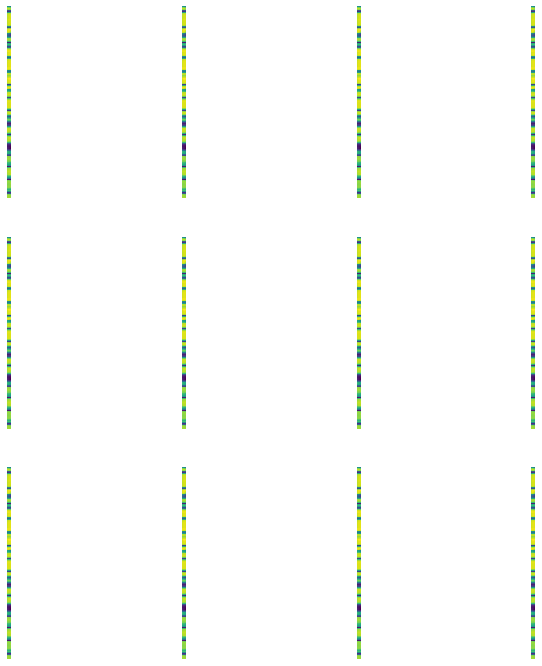

In [16]:
import numpy as np
import matplotlib.pyplot as plt
for images, labels in training_set.take(1):
    plt.figure(figsize=(12, 12))
    first_image = images[0]
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0)
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.axis("off")

In [17]:
base_model = keras.applications.Xception(
    weights='imagenet',  
    input_shape=(150, 150, 3),
    include_top=False) 

83689472/83683744 [==============================] - 1s 0us/step


In [18]:
base_model.trainable = False

In [19]:
inputs = keras.Input(shape=(150,150,3))

In [20]:
x=data_augmentation(inputs)

In [21]:
x=tf.keras.applications.xception.preprocess_input(x)

In [22]:
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=keras.metrics.BinaryAccuracy())
model.fit(training_set, epochs=20, validation_data=val_dataset)

Epoch 1/20
250/250 [==============================] - 775s 3s/step - loss: 0.1715 - binary_accuracy: 0.9269 - val_loss: 0.0812 - val_binary_accuracy: 0.9700
Epoch 2/20
250/250 [==============================] - 778s 3s/step - loss: 0.1219 - binary_accuracy: 0.9480 - val_loss: 0.0732 - val_binary_accuracy: 0.9730
Epoch 3/20
250/250 [==============================] - 785s 3s/step - loss: 0.1144 - binary_accuracy: 0.9529 - val_loss: 0.0710 - val_binary_accuracy: 0.9730
Epoch 4/20
250/250 [==============================] - 789s 3s/step - loss: 0.1086 - binary_accuracy: 0.9556 - val_loss: 0.0679 - val_binary_accuracy: 0.9750
Epoch 5/20
250/250 [==============================] - 790s 3s/step - loss: 0.1111 - binary_accuracy: 0.9572 - val_loss: 0.0676 - val_binary_accuracy: 0.9760
Epoch 6/20
250/250 [==============================] - 789s 3s/step - loss: 0.1125 - binary_accuracy: 0.9538 - val_loss: 0.0756 - val_binary_accuracy: 0.9760
Epoch 7/20
250/250 [==============================] - 793s